# Climate Coding Challenge

Climate change is impacting the way people live around the world

# Plot your results

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r boulder_climate_udf

In [13]:
# Import packages
import holoviews as hv
import hvplot.pandas

## STEP 1: Plot the temperature column vs time to explore the data

Plotting in Python is easy, but not quite this easy:

<Axes: xlabel='DATE'>

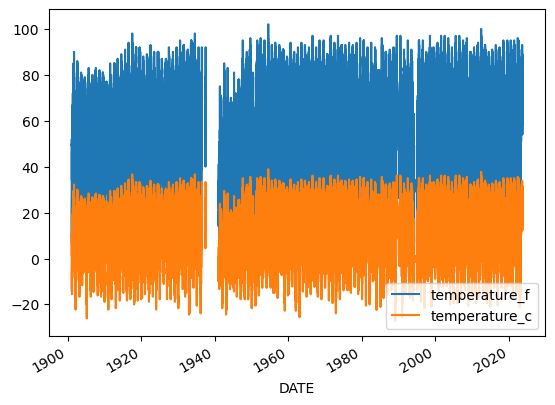

In [2]:
boulder_climate_udf.plot()

Looks like we have *both* temperature units on the same plot, and it’s
hard to see what it is because it’s missing labels!

> ****Label your plot****
>
> <figure>
> <img src="https://imgs.xkcd.com/comics/convincing.png"
> alt="Source: https://xkcd.com/833" />
> <figcaption aria-hidden="true">Source: https://xkcd.com/833</figcaption>
> </figure>
>
> Make sure each plot has:
>
> -   A title that explains where and when the data are from
> -   x- and y- axis labels with **units** where appropriate
> -   A legend where appropriate

When plotting in Python, you’ll always need to add some instructions on
labels and how you want your plot to look.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot your data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Change <code>dataframe</code> to <strong>your</strong>
<code>DataFrame</code> name.</li>
<li>Change <code>y=</code> to the name of your
<strong>temperature</strong> column name.</li>
<li>Use the <code>title</code>, <code>ylabel</code>, and
<code>xlabel</code> parameters to add key text to your plot.</li>
<li>Adjust the size of your figure using <code>figsize=(x,y)</code>
where <code>x</code> is figure width and <code>y</code> is figure
height</li>
</ol></div></div>

> **Tip**
>
> Labels have to be a *type* in Python called a **string**. You can make
> a string by putting quotes around your label, just like the column
> names in the sample code (eg `y='temperature'`).

<Axes: title={'center': 'Temperature in Boulder, CO'}, xlabel='Year', ylabel='Temperature ($^\\circ$C)'>

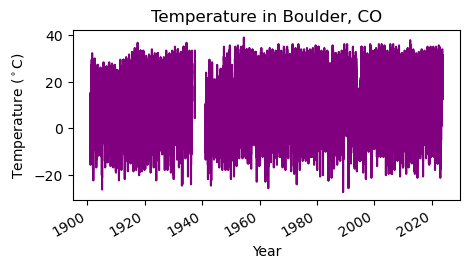

In [8]:
# Plot the data using .plot
boulder_climate_udf.plot(
    y='temperature_c',
    title='Temperature in Boulder, CO',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)',
    legend=False,
    color='purple',
    figsize=(5, 2.5))

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>There are many other things you can do to customize your plot. Take a
look at the <a
href="https://pandas.pydata.org/docs/user_guide/visualization.html">pandas
plotting galleries</a> and the <a
href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">documentation
of plot</a> to see if there’s other changes you want to make to your
plot. Some possibilities include:</p>
<ul>
<li>Remove the legend since there’s only one data series</li>
<li>Increase the figure size</li>
<li>Increase the font size</li>
<li>Change the colors</li>
<li>Use a bar graph instead (usually we use lines for time series, but
since this is annual it could go either way)</li>
<li>Add a trend line</li>
</ul>
<p>Not sure how to do any of these? Try searching the internet, or
asking an AI!</p></div></div>

## STEP 2: Clean up time series plots by resampling

You may notice that your plot looks a little “fuzzy”. This happens when
Python is trying to plot a value for every date, but the resolution of
the image is too low to actually do that. You can address this issue by
**resampling** the data, or summarizing it over a time period of your
choice. In this case, we will resample annually, giving us one data
point per year.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Resample</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Set the frequency of your final data by replacing
<code>DT_OFFSET</code>with a <strong>Datetime Offset Code</strong>.
Check out the table in the <a
href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects">pandas
datetime documentation</a> to find the one you want (we recommend the
start of the year).</li>
<li>Choose how to summarize each year of data by replacing
<code>agg_method_here</code> with a method that will calculate the
<strong>average annual value</strong>. Check out the <a
href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#basics">pandas
resampling documentation</a> for a list of common built-in options.</li>
<li>Add descriptive comments to the code so the next person reading it
knows what it is doing.</li>
</ol></div></div>

In [10]:
boulder_ann_temp_df = (
    boulder_climate_udf
    .resample('YS')
    .mean()
)
boulder_ann_temp_df

,temperature_f,temperature_c
DATE,,
1893-01-01,NaN,NaN
1894-01-01,NaN,NaN
1895-01-01,NaN,NaN
1896-01-01,NaN,NaN
1897-01-01,NaN,NaN
...,...,...
2019-01-01,54.426997,12.459443
2020-01-01,57.691460,14.273033
2021-01-01,57.538462,14.188034


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot Annual Data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Try plotting your new DataFrame in the cell below. Can you see what
is going on more clearly now? Don’t forget to adjust your labels!</li>
<li>If you write your code on one line, it will most likely be to long
to read without scrolling. Make sure you are following <a
href="https://peps.python.org/pep-0008/">PEP-8 style guidelines</a> by
keeping your lines less than 80 characters long. If you are working in
GitHub Codespaces, we have set you up with a vertical guide that is
between 79 and 80 characters – make sure your code doesn’t go past
it!</li>
<li>PEP-8 also suggests aligning any function parameters that are too
long. See some examples below for what to do and what not to do.</li>
</ol></div></div>

> **PEP-8 tips!**
>
> Following the [PEP-8 style guide](https://peps.python.org/pep-0008/)
> is important because it makes your code easy for you and other
> collaborators to read. When you are splitting function calls across
> multiple lines, your code should look like this:
>
> ``` python
> my_dataframe.plot(
>     y='column_name',
>     title=f'My Fantastic Plot',
>     xlabel='The x Axis',
>     ylabel='The y Axis'
> )
> ```
>
> or maybe this:
>
> ``` python
> my_dataframe.plot(y='column_name',
>                   title=f'My Fantastic Plot',
>                   xlabel='The x Axis',
>                   ylabel='The y Axis')
> ```

> **Warning**
>
> Try to avoid these [PEP-8](https://peps.python.org/pep-0008/)
> violations:
>
> ``` python
> my_dataframe.plot(y='column_name', title=f'My Fantastic Plot', xlabel='The x Axis', ylabel='The y Axis')
> ```
>
> or
>
> ``` python
> my_dataframe.plot(
>     y='column_name',
>       title=f'My Fantastic Plot',
>    xlabel='The x Axis',
>    ylabel='The y Axis'
> )
> ```
>
> or
>
> ``` python
> my_dataframe.plot(y='column_name',
>     title=f'My Fantastic Plot',
>     xlabel='The x Axis',
>     ylabel='The y Axis'
> )
> ```

<Axes: title={'center': 'Annual Average Temperature in Boulder, CO'}, xlabel='Year', ylabel='Temperature ($^\\circ$C)'>

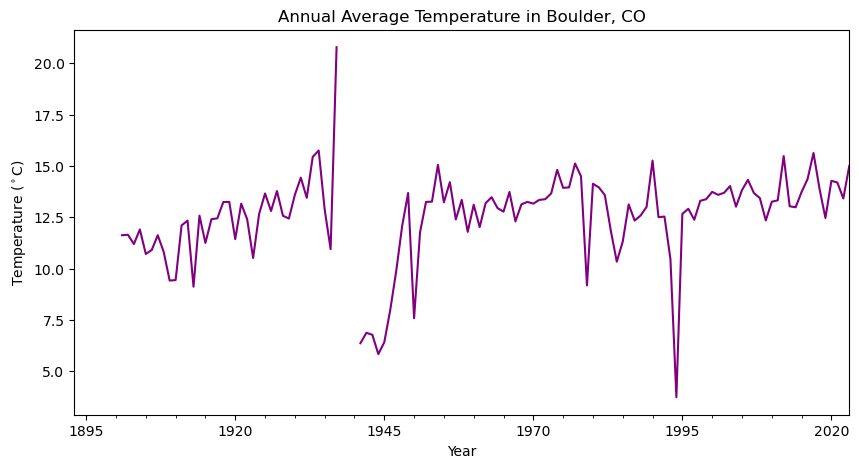

In [12]:
boulder_ann_temp_df.plot(
    y='temperature_c',
    title='Annual Average Temperature in Boulder, CO',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)',
    legend=False,
    color='purple',
    figsize=(10, 5))

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Interpret your plot</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Create a new Markdown cell below this one.</li>
<li>Using a <strong>bulleted list</strong> in Markdown, write down 2
things you notice about the data. What <strong>physical
phenomena</strong> or <strong>data anomaly</strong> could be causing
each one?</li>
</ol></div></div>

- I notice an unusual spike and a break in the data that could be caused by missing data
- Temperatures are increasing over time, likely due to climate change trends

## STEP 3: Check specific values with an interactive plot

You can use the `.hvplot()` method with similar arguments to create an
interactive plot.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Interactive Plot</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Copy your plotting code into the cell below.</li>
<li>Replace <code>.plot</code> in your code with
<code>.hvplot</code></li>
<li>Check that your code follows <a
href="https://peps.python.org/pep-0008/">PEP-8 guidelines</a>.</li>
</ol>
<p>Now, you should be able to hover over data points and see their
values!</p></div></div>

In [19]:
# Plot the annual data interactively
boulder_ann_temp_plot = boulder_ann_temp_df.hvplot(
    y='temperature_c',
    title='Annual Average Temperature in Boulder, CO',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)',
    color='purple',
    width=800, height=400)

boulder_ann_temp_plot

:Curve   [DATE]   (temperature_c)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Explore the data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Create a new Markdown cell below this one.</li>
<li>Hover over the lowest point on your plot. What is the overall
maximum annual average temperature?</li>
</ol></div></div>

The overall maximum annual average temperature is 20.778 degrees celsius.

## BONUS: Save your work

You will need to save your analyses and plots to tell others about what
you find.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?: Save Your Plot</div></div><div class="callout-body-container callout-body"><p>Just like with any other type of object in Python, if you want to
reuse your work, you need to give it a name.</p>
<ol type="1">
<li>Go back to your <code>hvplot</code> code, and give your plot a name
by assigning it to a variable. HINT: if you still want your plot to
display in your notebook, make sure to <strong>call</strong> its name at
the end of the cell.</li>
<li>Replace <code>my_plot</code> with the name you gave to your
plot.</li>
<li>Replace <code>'my_plot.html'</code> with the name you want for your
plot. If you change the file extension, <code>.html</code>, to
<code>.png</code>, you will get an image instead of an interactive
webpage, provided you have the necessary libraries installed.</li>
</ol>
<p>Once you run the code, you should see your saved plot in your files –
go ahead and open it up.</p></div></div>

> **Warning**
>
> If you are working in GitHub Codespaces, right-click on your file and
> download it to view it after saving.

In [20]:
hv.save(boulder_ann_temp_plot, 'boulder_ann_avg_temp.html')

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [21]:
%store boulder_ann_temp_df

Stored 'boulder_ann_temp_df' (DataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!